### This is the code corresponding to medium blog titled 
### A Visual introduction to neural networks' by Shikhar Sharma . 
### Contact shikharcic23@gmail.com for any assistance

In [49]:
## space for importing required libraries
from sklearn.datasets import make_classification, make_circles #libraries to generate data
import matplotlib.pyplot as plt # importing library to plot
from sklearn.linear_model import LogisticRegression #importing Logistic Regression 
import numpy as np #numpy library for data manipulation and plotting
from  sklearn.neural_network import MLPClassifier #to use neural net

## Creating a linearly separable data

In [50]:
X, y = make_classification(n_samples=40, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)


## Visualizing the data

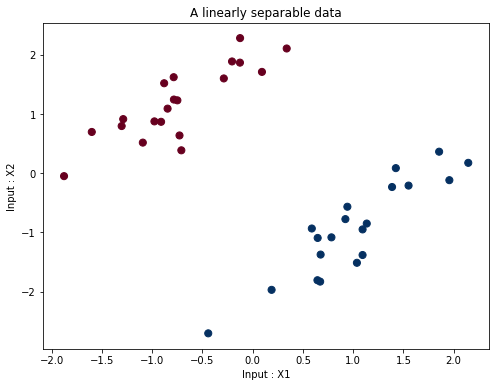

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0],X[:,1], c=y, s=50,cmap="RdBu")
ax.set_title('A linearly separable data')
ax.set_xlabel('Input : X1')
ax.set_ylabel('Input : X2')
ax.get_figure()


## Logistic Regression for classification of data

In [52]:
clf = LogisticRegression(penalty='l2') #Logistic Regression Classifier
clf.fit(X, y) #training/fitting the classifier
w=clf.coef_ #retrieving weights
b=clf.intercept_ #retrieving biases

### We have the parameters for logisitic regression from above. y=1/(1+ exp(-z)) is the logisitic function. lets assume y=1/2 or 0.5 be probability threshold. so with y=1/2 we get, 1+exp(-z) = 2, solving which we get z=0 as the equation of decision plane which in our case is m1*x1 + m2*x2+ b =0 . Lets plot it below

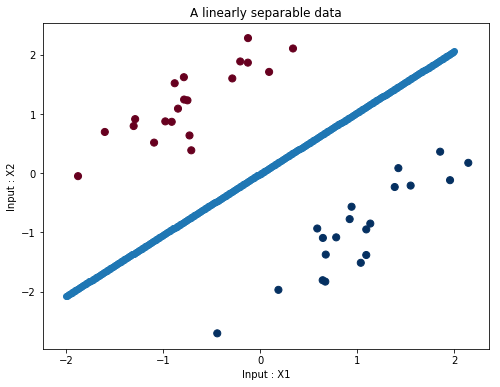

In [53]:
xx = np.linspace(-2, 2,500) # x data limit
y = (-w[0][0]*xx -  b[0])/(w[0][1]) #generate corresponding point
ax.scatter(xx,y,cmap="BrBg") #plot the point
ax.get_figure()

## Generating Non Linear Data

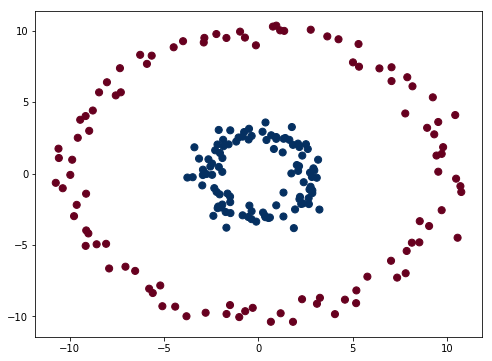

In [54]:
np.random.seed(4)
numPoints = 200
X, y = make_circles(n_samples=numPoints,
  factor=.3, noise=.05) #function to yield non circle data provided by sklearn
X = 10 * X

f, ax = plt.subplots(figsize=(8, 6)) #plotting data
ax.scatter(X[:,0],X[:,1], c=y, s=50,cmap="RdBu")
ax.get_figure()

## Applying logisitic regression and plotting boundary


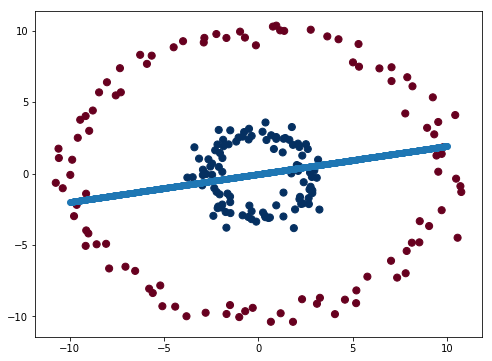

In [55]:
clf = LogisticRegression(penalty='l2') #Logistic Regression Classifier
clf.fit(X, y) #training/fitting the classifier
w=clf.coef_ #retrieving weights
b=clf.intercept_ #retrieving biases
xx = np.linspace(-10, 10,500) # x data limit
yy= (-w[0][0]*xx -  b[0])/(w[0][1]) #generate corresponding point
ax.scatter(xx,yy,cmap="BrBg") #plot the point
ax.get_figure()

## Not a very impressive classification . Lets try to solve using neural nets instead

## Parameters that can be tuned

In [56]:
architecture = (4,4,2) ###(A num_layers sized tuple with number of hidden neurons as each element)
activationf = 'relu'
learning_rate=0.01

## Training Neural Net

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=architecture,activation=activationf,learning_rate_init=learning_rate)
mlp.fit(X,y) #training classifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 2), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
## Predictions of trained classifiers to plot the decision plane

In [59]:

xx=np.linspace(-11, 11,1000) #bounds of data
yy=np.linspace(-11,11,1000)

X11=[]
X22=[]
pred=[]
for point1 in xx:
    for point2 in yy:
        X11.append(point1)
        X22.append(point2)
        pred.append(mlp.predict(np.array([point1,point2]).reshape(1,-1))) #getting predictions across each point
        
        

## Plotting the decision plane

In [60]:
f, ax1 = plt.subplots(figsize=(8, 6))
#ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
ax1.scatter(X11, X22, c=pred, s=50, linewidth=1)

ax1.scatter(X[:,0], X[:, 1], c=y, s=50,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)

ax1.set(aspect="equal",
       xlim=(-10, 10), ylim=(-10, 10),
       xlabel="$X_1$", ylabel="$X_2$")



[(-10, 10),
 (-10, 10),
 None]

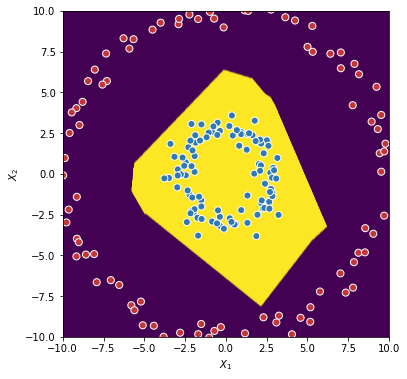

In [61]:
ax1.get_figure()